# CKME136 - Text Classification & Sentiment Analysis - isantillan

***

#### 1.0 Introduction

#### 2.0 Background

#### 3.0 Data Description

#### 4.0 Methodology
- **4.1 Data Collection & Processing**
 - 4.1.1 Importing the required libraries
 - 4.1.2 Creating the Twitter App & registering for a Twitter API
 - 4.1.3 Creating a pandas DataFrame
- **4.2 Exploratory Data Analysis**
 - 4.2.1 Popularity and averages
 - 4.2.2 Time Series - Length, Likes & Retweets
 - 4.2.3 Pie chart - Tweet Sources
 - 4.2.4 WordCloud
- **4.3 Text Analysis**
 - 4.3.1 Sentiment Analysis
 - 4.3.2 Analyzing the results
 - 4.3.3 BagOfWords; CountVectorizer

#### 5.0 Conclusion
#### 6.0 Future Work & Next steps
#### 7.0 References


***

## 1.0 Introduction

For the CKME136 Capstone Project, we were provided with the following themes to work with:
- Text Classication and Sentiment Analysis
- Classication and Regression (non-textual dataset)
- Predictive Analytics (Pattern mining, Time-series, Causality, etc.)
- Recommender systems (Collaborative; Content-based ltering, etc.)
- Anomaly Detection (outliers detection)
- Data Mining and knowledge discovery

For this project, we'll be focusing on `Text Classication & Sentiment Analysis`

## 2.0 Background

**Sentiment Analysis** also known as *Opinion Mining* is the process of extracting and understanding human feelings from data. Sentiment analysis is widely applied to reviews and social media for a variety of applications, ranging from marketing to customer service.

Traditionally pyschologists would formulate a hypothesis, then to test it they would find a subset of people that would fit their cateogry, bring them into the lab and ask them to do some tasks while recording the results. But with data freely available, we as Data Scientists can do the same thing with the best psychology tool out there, twitter! 

<img src="../reports/figures/twitter.png" />

Twitter is a treasure trove of sentiment. People around the world output thousands of reactions and opinions on every topic under the sun, every second of every day. It's like one giant psychological database that is constantly being updated and we can use it ot analyze millions of text snippets, in seconds, with the power of machine learning. 

## 3.0 Data Description

<img src="../reports/figures/stantec_proud.png" />

In this project, we'll use *Tweepy* to scrape **Stantec's** twitter account and use the Natural Language Libraries *TextBlob* and *VADER* to analyze the tweet's sentiment.

Please see here for the full list of the 
[file stucture of tweepy status object json](https://gist.github.com/dev-techmoe/ef676cdd03ac47ac503e856282077bf2#file-structure-of-tweepy-status-object-json).

For this project, we'll be using the following features :

|Name|Description|
|------|------|
|ID|Twitter User ID|
|source|tweet source|
|created_at|Date created |
|text|tweet text |
|favorite_count|Favorite count|
|retweet_count|Retweet count|

## 4.0 Methodology

**Tweepy** is an easy-to-use Python library for accessing the Twitter API.

**TextBlob** is a Python (2 and 3) library for processing textual data which is built on the NTLK package. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more

**VADER-Sentiment-Analysis** 
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

### How does Sentiment Analysis work?

<img src="../reports/figures/text_mining.png" />

<img src="../reports/figures/text_preprocessing.png" />

**Tokenization** is the process of breaking a stream of textual content up into words, terms, symbols, or some other meaningful elements called tokens.

**Stemming** is the removal of "variable" parts of words, leaving only the stem. Treating words with the same stem as the same for analysis:
 - likes > like
 - liked > like
 - liking > like
 - like > like
 
**Lemmatization** is similar to stemming, but leaves the real word, not the stem:
 - creativity > create

### 4.1 Data Collection & Processing

#### 4.1.1 Importing the required libraries

- data collection
    - **tweepy** - An easy-to-use Python library for accessing the Twitter API.
- data manipulation
    - **numpy** - the fundamental package for scientific computing with Python
    - **pandas** - for using data structures and data analysis tools
    - **re** - This module provides regular expression matching operations similar to those found in Perl. Both patterns and strings to be searched can be Unicode strings as well as 8-bit strings.
- text transformation
    - **CountVectorizer** - converts a collection of text documents to a matrix of token counts
- sentiment analysis
    - **textblob** - is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation
    - **SentimentIntensityAnalyzer** - VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 
- visualization
    - **wordcloud** - A little word cloud generator in Python
    - **ipython.display** - Public API for display tools in IPython
    - **matplotlib** - a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms
    - **seaborn** - a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.



In [1]:
# data collection
import tweepy

# data manipulation
import pandas as pd
import numpy as np
import re

# text transformation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# sentiment analysis
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# topic modeling
from sklearn.decomposition import LatentDirichletAllocation, NMF

# visualization
from wordcloud import WordCloud
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 4.1.2 Creating the Twitter App & registering for a Twitter API

<img src="../reports/figures/api.png" />

An **API** or an **Application Programing Interface** is a gateway that lets you access some servers' internal functionality. In our case, Twitter. Thus, we will be able to read and write tweets right from our app using Twitter's API. 

<img src="../reports/figures/api.png" />

First we'll want to make sure that we have a Twitter account set up with a verified phone number attached to it. Once we have that, we can create our first Twitter app. We'll select the 'Create New App' button and type in a *name* and a *description* of our app, as well as a website. Once we have all the required information, we can press the 'Create Your Twitter application' button on the bottom and our app is created!

<img src="../reports/figures/twitter-app2.png" />

We can go to our app and click on the 'Keys and Access Tokens' Tab. We're going to need to use these keys in our script to authenticate or verify our identity with Twitter 

<img src="../reports/figures/twitter-app3.png" />

<img src="../reports/figures/twitter-app4.png" />

***

For the purpose of this project, we'll show the required keys here to access twitter:

Let's create the 4 variables that we'll need to authenticate with Twitter, which basically means, login via code. 

- consumer_key
- consumer_secret
- access_token
- access_token_secret

To do that, we'll create a variable called auth for authentication and use the **OAuthhandler** of tweepy. This method takes 2 arguements, the `consumer_key` and the `consumer_secret`.

We'll also need to call the **set_access_token** on the auth variable which takes 2 arguements: the `access_token` and the `access_token_secret`. That's it! We've created our authentication variable; `auth`.

In [2]:
# consumer keys
consumer_key = 'gZcNe3VqKWk9AigyM05Vq7dM7'
consumer_secret = 'Se0wIQGdk3uSaM1ts1DTNsfGtsfvIz6ydouzOhjvYnb3nzGvJ9'

# access token keys
access_token = '23886393-qiNYmMeeA4aEh8HkhbceLyhzXC9Ib90Hx5ZQlRBmb'
access_token_secret = '6jgNvJiB7lrUTdQBIXq8bwBhA1ARb72gtZDyFjzbNyLUw'

Now we want to create our main variable from which we'll do all of our Twitter analysis on. We'll call it `api` and assign it a value from the tweepy api method which takes a single authentication argument

In [3]:
# connect to twitter API
def twitter_connect():
    '''
    function to connect to twitter's API
    with the provided consumer and access keys
    '''
    # authentication
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    
    # return api with authentication:
    api = tweepy.API(auth)
    return api

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [5]:
twitter_connect

<function __main__.twitter_connect()>

In [6]:
# create an extractor object
extractor = twitter_connect()

# create a tweet list 
tweets = extractor.user_timeline(screen_name='stantec', count=200) # max is 200
print("Extracted {} tweets.\n".format(len(tweets)))

# print last 5 tweets:
print("5 most recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()


Extracted 200 tweets.

5 most recent tweets:

RT @BuyADigger: Peter Brett Associates to be bought by Stantec https://t.co/ikLzhv4Oy1 @PeterBrettLLP @Stantec @shillington_k https://t.co/…

RT @Waterco_Consult: Interesting developments as @Stantec signs Letter of Intent to Acquire @PeterBrettLLP https://t.co/dXrXzkJmOb

RT @ncedigital: . @Stantec has agreed takeover terms with @PeterBrettLLP  https://t.co/KqTdgtnspI

We’re widening our UK presence with the planned acquisition of @PetterBrettLLP – more than 700 team members alongsi… https://t.co/1NxQp1FhuY

By promoting physical activity and social interaction, the WELL Community Standard turns development into a health-… https://t.co/ae4JpIRjiZ



#### 4.1.3 Creating a pandas DataFrame

In [7]:
# create a pandas dataframe
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# display the first 10 tweets
display(data.head(10))

,Tweets
0,RT @BuyADigger: Peter Brett Associates to be b...
1,RT @Waterco_Consult: Interesting developments ...
2,RT @ncedigital: . @Stantec has agreed takeover...
3,We’re widening our UK presence with the planne...
4,By promoting physical activity and social inte...
5,Find out how the Mid-Barataria diversion and t...
6,Our @nelszzp examines how the WELL Community S...
7,If you blink you may miss it – but squint and ...
8,ICYMI: More corporate jets are in the air. Wha...
9,ICYMI: Are you looking to prevent insurance cl...


In [8]:
# investigating internal methods of the Tweet object
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [9]:
# let's explore the following 
print(tweets[0].id)
print(tweets[0].source)
print(tweets[0].created_at)
print(tweets[0].lang)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1029715783709085697
Hootsuite Inc.
2018-08-15 13:05:48
en
0
1
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'BuyADigger', 'name': 'Buy a Digger', 'id': 2303185002, 'id_str': '2303185002', 'indices': [3, 14]}, {'screen_name': 'PeterBrettLLP', 'name': 'Peter Brett (PBA)', 'id': 500663930, 'id_str': '500663930', 'indices': [87, 101]}, {'screen_name': 'Stantec', 'name': 'Stantec', 'id': 21251001, 'id_str': '21251001', 'indices': [102, 110]}, {'screen_name': 'shillington_k', 'name': 'Keith Shillington', 'id': 1969145796, 'id_str': '1969145796', 'indices': [111, 125]}], 'urls': [{'url': 'https://t.co/ikLzhv4Oy1', 'expanded_url': 'https://buff.ly/2MtfdtQ', 'display_url': 'buff.ly/2MtfdtQ', 'indices': [63, 86]}]}


In [10]:
# adding additional information to our DataFrame
data['ID'] = np.array([tweet.id for tweet in tweets])
data['source'] = np.array([tweet.source for tweet in tweets])
data['date'] = np.array([tweet.created_at for tweet in tweets])
data['lang'] = np.array([tweet.lang for tweet in tweets])
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['rts'] = np.array([tweet.retweet_count for tweet in tweets])

display(data.head())

,Tweets,ID,source,date,lang,len,likes,rts
0,RT @BuyADigger: Peter Brett Associates to be b...,1029715783709085697,Hootsuite Inc.,2018-08-15 13:05:48,en,140,0,1
1,RT @Waterco_Consult: Interesting developments ...,1029715538640076800,Hootsuite Inc.,2018-08-15 13:04:50,en,130,0,1
2,RT @ncedigital: . @Stantec has agreed takeover...,1029715382007984128,Hootsuite Inc.,2018-08-15 13:04:12,en,97,0,2
3,We’re widening our UK presence with the planne...,1029474112425680896,Hootsuite Inc.,2018-08-14 21:05:29,en,140,37,12
4,By promoting physical activity and social inte...,1029341889416388608,Hootsuite Inc.,2018-08-14 12:20:05,en,140,7,1


## 4.2 Exploratory Data Analysis

#### 4.2.1 Popularity and averages

In [11]:
# mean tweet length
mean = np.mean(data['len'])

print("The tweet's average length is: {}".format(mean))

The tweet's average length is: 137.755


Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values

In [12]:
data.describe()

,ID,len,likes,rts
count,2.000000e+02,200.000000,200.000000,200.000000
mean,1.019480e+18,137.755000,5.200000,1.640000
std,6.131212e+15,8.731907,5.793776,1.933674
min,1.009972e+18,50.000000,0.000000,0.000000
25%,1.013777e+18,139.000000,2.000000,0.000000
50%,1.019557e+18,140.000000,4.000000,1.000000
75%,1.025070e+18,140.000000,7.000000,2.000000
max,1.029716e+18,148.000000,43.000000,12.000000


In [13]:
# find the tweet that has the most likes and retweets.

likes_max = np.max(data['likes'])
rt_max = np.max(data['rts'])

likes = data[data.likes == likes_max].index[0]
rt = data[data.rts == rt_max].index[0]

# most likes 
print("The tweet that has the most likes is: \n{}".format(data['Tweets'][likes]))
print("Date & Time: {}".format(data['date'][likes]))
print("Number of likes: {}".format(likes_max))
print("{} characters.\n".format(data['len'][likes]))

# most retweets 
print("The tweet that has the most retweets is: \n{}".format(data['Tweets'][rt]))
print("Date & Time: {}".format(data['date'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet that has the most likes is: 
In a few months, our Edmonton team will begin moving into the Stantec Tower! Yesterday, signage from one of our off… https://t.co/7zh2OytWPx
Date & Time: 2018-08-02 20:05:06
Number of likes: 43
140 characters.

The tweet that has the most retweets is: 
We’re widening our UK presence with the planned acquisition of @PetterBrettLLP – more than 700 team members alongsi… https://t.co/1NxQp1FhuY
Date & Time: 2018-08-14 21:05:29
Number of retweets: 12
140 characters.



#### 4.2.2 Time Series - Length, Likes & Retweets

In [14]:
# create a time series for data
tlen = pd.Series(data=data['len'].values, index=data['date'])
tlik = pd.Series(data=data['likes'].values, index=data['date'])
trts = pd.Series(data=data['rts'].values, index=data['date'])

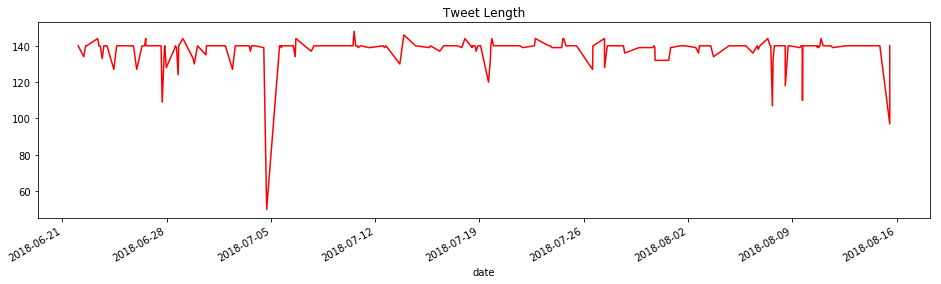

In [15]:
# plot lengths along time
tlen.plot(figsize=(16,4), color='r', title='Tweet Length')

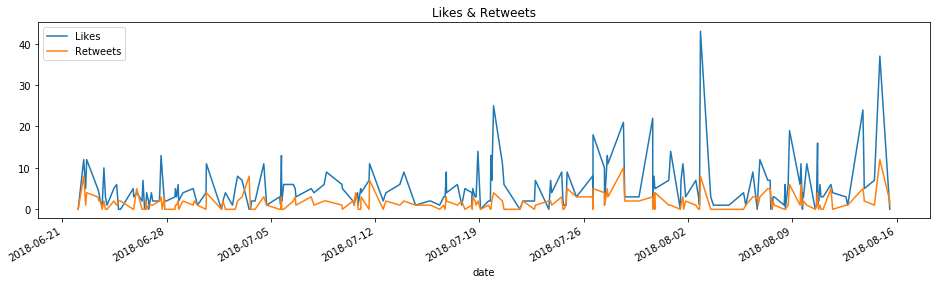

In [16]:
# visualizing likes vs retweets
tlik.plot(figsize=(16,4), label="Likes", legend=True, title='Likes & Retweets')
trts.plot(figsize=(16,4), label="Retweets", legend=True)

#### 4.2.3 Pie chart - Tweet sources

In [17]:
# grab all sources
sources = []
for source in data['source']:
    if source not in sources:
        sources.append(source)
        
# print sources list
print("Tweet content sources:")
for source in sources:
    print("- {}".format(source))

Tweet content sources:
- Hootsuite Inc.
- Twitter Web Client
- Twitter for iPhone


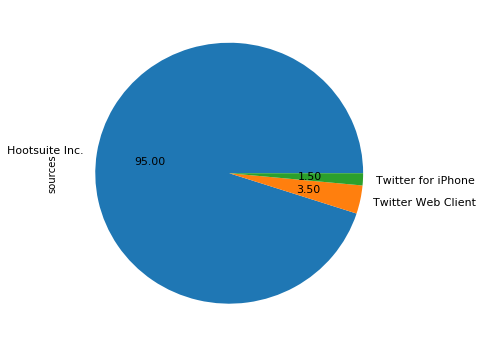

In [18]:
# create a numpy vector mapped to labels
percent = np.zeros(len(sources))

for source in data['source']:
    for index in range (len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
percent /= 100

# pie chart
pie_chart = pd.Series(percent, index=sources, name='sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6,6))

> *Hootsuite* is a social media management platform. The system’s user interface takes the form of a dashboard, and supports social network integrations for Twitter, Facebook, Instagram, LinkedIn, Google+ and YouTube.

#### 4.2.4 n-grams

An n-gram is a contiguous sequence of n items from a given sample of text or speech.

In [19]:
# function to clean the tweets
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing 
    links and special characters with regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z[0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\/S+)", " ", tweet).split())

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = np.array([clean_tweet(tweet) for tweet in data['Tweets']]).tolist()

max_features = None

one_gram_vectorizer = CountVectorizer(max_features=max_features, ngram_range=(1, 1))
one_gram_vectorizer.fit_transform(corpus).todense()
one_gram = one_gram_vectorizer.vocabulary_

bi_gram_vectorizer = CountVectorizer(max_features=max_features, ngram_range=(2, 2))
bi_gram_vectorizer.fit_transform(corpus).todense()
bi_gram = bi_gram_vectorizer.vocabulary_

tri_gram_vectorizer = CountVectorizer(max_features=max_features, ngram_range=(3, 3))
tri_gram_vectorizer.fit_transform(corpus).todense()
tri_gram = tri_gram_vectorizer.vocabulary_


In [21]:
one_gram_list = sorted(one_gram.items(), 
                       key=lambda x: x[1], 
                       reverse = True)
one_gram_list[:10]

[('zx5cgjfgsi', 1495),
 ('zx096zrrie', 1494),
 ('zu', 1493),
 ('zone', 1492),
 ('zn7pyatpn7', 1491),
 ('zmd4vk7gj9', 1490),
 ('zhrm0fomdr', 1489),
 ('zealand', 1488),
 ('z2pgd2qujs', 1487),
 ('z1ytb6dzgf', 1486)]

In [22]:
bi_gram_list = sorted(bi_gram.items(), 
                      key=lambda x: x[1], 
                      reverse = True)
bi_gram_list[:10]

[('zu https', 2830),
 ('zone canada', 2829),
 ('zealand who', 2828),
 ('zealand office', 2827),
 ('zealand at', 2826),
 ('yps from', 2825),
 ('ypg team', 2824),
 ('your workday', 2823),
 ('your stream', 2822),
 ('your office', 2821)]

In [23]:
tri_gram_list = sorted(tri_gram.items(), 
                       key=lambda x: x[1], 
                      reverse = True)
tri_gram_list[:10]

[('zu https co', 3109),
 ('zone canada conference', 3108),
 ('zealand who being', 3107),
 ('zealand office are', 3106),
 ('zealand at 20pm', 3105),
 ('yps from thenetherlands', 3104),
 ('ypg team better', 3103),
 ('your workday indoors', 3102),
 ('your stream restoration', 3101),
 ('your office needs', 3100)]

## 4.3 Text Analysis

### 4.3.1 Sentiment Analysis

In [24]:

# function to classify the tweet's polarity (-1, 0, 1) using textBlob
def analyze_sentiment_tb(tweet):
    '''
    Function to classify the polarity of a tweet
    using textblob
    '''
    analysis_tb = TextBlob(clean_tweet(tweet))
    if analysis_tb.sentiment.polarity > 0:
        return 1
    elif analysis_tb.sentiment.polarity == 0:
        return 0
    else:
        return -1

# function to classify the tweet's polarity (-1, 0, 1) using VADER
def analyze_sentiment_vd(tweet):
    '''
    Function to classify the polarity of a tweet using
    VADER (Valence Aware Dictionary and sEntiment Reasoner) 
    '''
    analysis_vd = SentimentIntensityAnalyzer()
    vd = analysis_vd.polarity_scores(clean_tweet(tweet))

    if vd['compound'] > 0:
        return 1
    elif vd['compound'] == 0:
        return 0
    else:
        return -1


**Sentiment Analysis** is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc., is positive, negative, or neutral.

We have already imported `textblob` and `re` in earlier steps to help us with the Sentiment Analysis. 

Let's create 2 functions to help us to clean the tweets and classify its polarity.

We'll create an additional column in our existing dataframe and add the tweet's polarity

In [25]:
# create a column with the result of the functions created above
data['SA_tb'] = np.array([analyze_sentiment_tb(tweet) for tweet in data['Tweets']])
data['SA_vd'] = np.array([analyze_sentiment_vd(tweet) for tweet in data['Tweets']])

# display the first 10 tweets
display(data.head(10))

,Tweets,ID,source,date,lang,len,likes,rts,SA_tb,SA_vd
0,RT @BuyADigger: Peter Brett Associates to be b...,1029715783709085697,Hootsuite Inc.,2018-08-15 13:05:48,en,140,0,1,0,0
1,RT @Waterco_Consult: Interesting developments ...,1029715538640076800,Hootsuite Inc.,2018-08-15 13:04:50,en,130,0,1,1,1
2,RT @ncedigital: . @Stantec has agreed takeover...,1029715382007984128,Hootsuite Inc.,2018-08-15 13:04:12,en,97,0,2,0,1
3,We’re widening our UK presence with the planne...,1029474112425680896,Hootsuite Inc.,2018-08-14 21:05:29,en,140,37,12,1,0
4,By promoting physical activity and social inte...,1029341889416388608,Hootsuite Inc.,2018-08-14 12:20:05,en,140,7,1,1,1
5,Find out how the Mid-Barataria diversion and t...,1029093942346899457,Hootsuite Inc.,2018-08-13 19:54:50,en,140,5,2,0,0
6,Our @nelszzp examines how the WELL Community S...,1029087729592627201,Hootsuite Inc.,2018-08-13 19:30:08,en,140,10,3,0,1
7,If you blink you may miss it – but squint and ...,1029061496372834304,Twitter Web Client,2018-08-13 17:45:54,en,140,24,5,-1,-1
8,ICYMI: More corporate jets are in the air. Wha...,1028692610184040448,Hootsuite Inc.,2018-08-12 17:20:05,en,140,1,1,1,0
9,ICYMI: Are you looking to prevent insurance cl...,1028649859937693697,Hootsuite Inc.,2018-08-12 14:30:12,en,140,3,1,0,1


#### 4.3.2 Analyzing the results

**TextBlob** - The sentiment property returns a namedtuple of the form *Sentiment*(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.


**Polarity** measures how positive or negative some texts is and **subjectivity** measures how much of an opinion it is versus how much factual.

In [26]:
analysis_tb = TextBlob(tweet.text)
print(tweet.text, analysis_tb.sentiment)

By promoting physical activity and social interaction, the WELL Community Standard turns development into a health-… https://t.co/ae4JpIRjiZ Sentiment(polarity=0.011111111111111112, subjectivity=0.06984126984126983)


**VADER** - The **compound score** is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

In [27]:
analysis_vd = SentimentIntensityAnalyzer()
vd = analysis_vd.polarity_scores(tweet.text)
print(tweet.text,": ", vd)

By promoting physical activity and social interaction, the WELL Community Standard turns development into a health-… https://t.co/ae4JpIRjiZ :  {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.6523}


Count the number of positive, negative, neutral tweets and extract the percentages.

In [28]:
# extract the positive, negative and neutral tweets

# textBlob
pos_tweets_tb = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA_tb'][index] > 0]
neu_tweets_tb = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA_tb'][index] == 0]
neg_tweets_tb = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA_tb'][index] < 0]
# vader
pos_tweets_vd = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA_vd'][index] > 0]
neu_tweets_vd = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA_vd'][index] == 0]
neg_tweets_vd = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA_vd'][index] < 0]

In [29]:
# print the percentages

# textBlob
print("TextBlob - Perecentage of positive tweets: {}%".format(len(pos_tweets_tb)*100/len(data['Tweets'])))
print("TextBlob - Perecentage of neutral tweets: {}%".format(len(neu_tweets_tb)*100/len(data['Tweets']))) 
print("TextBlob - Perecentage of negative tweets: {}% \n".format(len(neg_tweets_tb)*100/len(data['Tweets'])))      
# vader
print("VADER - Perecentage of positive tweets: {}%".format(len(pos_tweets_vd)*100/len(data['Tweets'])))
print("VADER - Perecentage of neutral tweets: {}%".format(len(neu_tweets_vd)*100/len(data['Tweets']))) 
print("VADER - Perecentage of negative tweets: {}%".format(len(neg_tweets_vd)*100/len(data['Tweets'])))      

TextBlob - Perecentage of positive tweets: 49.0%
TextBlob - Perecentage of neutral tweets: 41.0%
TextBlob - Perecentage of negative tweets: 10.0% 

VADER - Perecentage of positive tweets: 60.0%
VADER - Perecentage of neutral tweets: 31.0%
VADER - Perecentage of negative tweets: 9.0%


### 4.3.2 WordCloud

Let's generate a WorldCloud from tweets from the **Stantec** account

In [30]:
def tweet_search(query, limit = 200, language = 'en', remove = []):
    '''
    Function to search for tweets, setting default language,
    and removing stopwords
    '''
    # create a blank variable
    text = ""
    # Iterate through Twitter using Tweepy to find our query in our language, with our defined limit
    # For every tweet that has our query, add it ot our text holder in lower case
    for tweet in tweepy.Cursor(api.search, q = query, lang = language).items(limit):
        text += tweet.text.lower()
        
        # Twitter has lots of links, we need to remove the commons parts of links to clean our data
        # First, create a list of terms that we want ot remove. This contains  https & co, alongside any words in our remove list
        removeWords = ["https", "co", "rt", "join"]
        removeWords += remove
        
    # For each word in our removeWords list, replace it with nothing in our main text 
    for word in removeWords:
        text = text.replace(word, "")
    # return our clean text
    return text

In [31]:
stantec_tweets = tweet_search("stantec", remove =["stantec", "stn", "local", "top", "pmryihr7ir", "4d8n0ihgs2",
                                                 "facebook", "page", "sy", "fter", "check", "sure", "dgrummettctv", "snapped",
                                                 "yer", "might"])

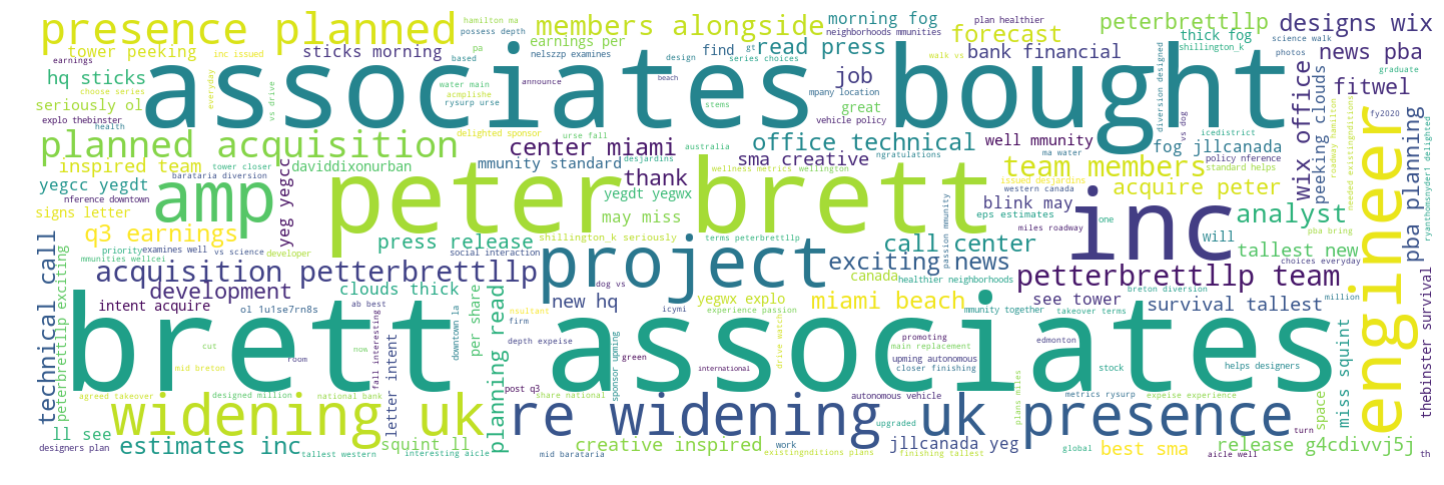

In [32]:
wordcloud = WordCloud(background_color = 'white', width = 1400, height = 450).generate(stantec_tweets)
plt.figure(figsize = (20,10), facecolor = 'w')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### 4.3.3 Topic Modeling

**latent Dirichlet allocation (LDA)** is a *generative statistical model* that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar

**Non-negative Matrix Factorization (NMF)** is a *Linear-algeabreic model*, that factors high-dimensional vectors into a low-dimensionality representation

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = np.array([clean_tweet(tweet) for tweet in data['Tweets']]).tolist()

vectorizer = CountVectorizer(max_features=1000)
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

X_train_counts = vectorizer.fit_transform(corpus)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'rt': 611, 'brett': 190, 'associates': 119, 'to': 811, 'be': 144, 'bought': 183, 'by': 209, 'stantec': 711, 'https': 354, 'co': 225, 'as': 116, 'signs': 670, 'of': 458, 'acquire': 63, 'has': 337, 'agreed': 75, 'takeover': 755, 'terms': 776, 'with': 938, 'we': 914, 're': 549, 'widening': 932, 'our': 469, 'uk': 851, 'presence': 497, 'the': 783, 'acquisition': 64, 'more': 439, 'than': 780, '700': 42, 'team': 768, 'members': 430, 'alongsi': 84, '1nxqp1fhuy': 13, 'promoting': 521, 'physical': 482, 'activity': 66, 'and': 94, 'social': 683, 'well': 920, 'community': 231, 'standard': 710, 'turns': 843, 'development': 260, 'into': 384, 'health': 340, 'ae4jpirjiz': 68, 'find': 314, 'out': 470, 'how': 353, 'mid': 432, 'barataria': 137, 'diversion': 269, 'designed': 254, '800': 46, 'breton': 189, 'projects': 518, 'will': 933, 'qultow7yij': 540, 'helps': 345, 'designers': 256, 'p

**TFIDF** - Term Frequency - Inverse Document Frequency is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. Gives more weight to rare words.

- some words are more important indicators of relevance than other because they are more rare

In [34]:
# create term-document matrices
max_features = 1000

# tf-idf
tf = TfidfVectorizer(max_df = 0.95, min_df = 2, 
                     max_features = max_features, 
                     stop_words = 'english')
features_tfidf = tf.fit_transform(corpus)
feature_names_tfidf = tf.get_feature_names()

# bag-of-words
bow = CountVectorizer(max_df = 0.95, min_df = 2, 
                      max_features = max_features, 
                      stop_words = 'english')
features_bow = bow.fit_transform(corpus)
feature_names_bow = bow.get_feature_names()

In [35]:
# train the models
# specify the number of topics in the documents
topics_count = 5

# train an LDA model
lda = LatentDirichletAllocation(n_components = topics_count, max_iter = 5, 
                                random_state = 0, learning_method = "online")
lda.fit(features_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=5, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [36]:
# train an NMF model
nmf = NMF(n_components = topics_count, random_state = 0, 
          alpha = 0.1, l1_ratio = 0.5, init = "nndsvd") 
                                    #Nonnegative Double Singular Value Decomposition
nmf.fit(features_bow)

NMF(alpha=0.1, beta_loss='frobenius', init='nndsvd', l1_ratio=0.5,
  max_iter=200, n_components=5, random_state=0, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [37]:
# display topics

def show_topics(model, feature_names, top_words = 10):
    """
    Functiion to display the top words from a model
    """
    print("Model: %s" % model.__class__.__name__)
    for i, topic in enumerate(model.components_):
        print("Topic %i\n%r\n" % (i, ", ".join([feature_names[x] for x in topic.argsort()[:-top_words - 1: -1]])))

In [38]:
# print the topics obtained from the NMF model
show_topics(nmf, feature_names_bow)

Model: NMF
Topic 0
'stantec, team, water, members, sustainable, vs, flights, serving, minneapolis, convos'

Topic 1
'icymi, design, team, help, big, thompson, brought, river, restore, rehabilitate'

Topic 2
'new, project, icymi, years, old, skate, completion, expansion, standard, parks'

Topic 3
'aviation, senior, general, jets, corporate, does, mean, air, airports, planner'

Topic 4
'amp, video, like, project, stacy, fleming, icymi, look, designers, architecture'



In [39]:
# print LDA topics
show_topics(lda, feature_names_tfidf)

Model: LatentDirichletAllocation
Topic 0
'stantec, team, new, rt, great, icymi, technology, past, 300, leaders'

Topic 1
'design, amp, showcase, business, proud, work, awards, perfect, denver, gaye'

Topic 2
'look, water, icymi, amp, things, project, projects, housing, building, shares'

Topic 3
'proud, community, stacy, uk, outdoor, series, 2018, like, emerging, month'

Topic 4
'di, il, icymi, new, project, big, stantecproud, design, aviation, del'



## 5.0 Conclusion

To summarize, this project provides two methods to perform sentiment analysis on Stantec's tweets and found 50% positive and 40.5% negative using TextBlob
- TextBlob - Perecentage of positive tweets: 50.0%
- TextBlob - Perecentage of neutral tweets: 40.5%
- TextBlob - Perecentage of negative tweets: 9.5% 

and is a bit better using VADER at 56.5% positvie and 8.0% negative.
- VADER - Perecentage of positive tweets: 56.5%
- VADER - Perecentage of neutral tweets: 35.5%
- VADER - Perecentage of negative tweets: 8.0%

We performed topic modeling using LDA and NMF and found the following topics below:

**Model: NMF**

`Topic 0
'icymi, housing, pop, explains, mile, today, blog, differences, isn, create'

Topic 1
'team, stantec, design, water, help, big, implement, brought, restore, river'

Topic 2
'new, read, conference, 2018, project, heading, fredericton, blog, post, csce'

Topic 3
'years, joe, examines, geller, experts, decline, urban, continued, suburban, predicted'

Topic 4
'amp, video, project, like, stacy, fleming, engineering, look, designers, does'`

**Model: LatentDirichletAllocation**

`Topic 0
'conference, design, heading, team, fredericton, di, post, 2018, improve, icymi'

Topic 1
'new, today, proud, il, project, icymi, share, pop, years, create'

Topic 2
'icymi, stantec, bmx, video, amp, community, don, offer, tracks, project'

Topic 3
'mile, la, suburban, make, geller, joe, examines, rebound, experts, 2018'

Topic 4
'women, engineering, denver, isn, day, team, housing, year, communities, today'`

## 6.0 Future Work & Next steps

- use the coordinates from the tweepy object to plot the tweets on a geographical map
- use different feature representation, ie: Word2Vec, GloVe
- use neural network for modelling
- use other Natural Language toolkits like, SpaCY, Genism, Spark NLP
- use more tweets, > max of 200
- investigate the topics found
- is there a correlation between the sentiment and the amount of retweets and likes and time of day?
 - break down time by morning, midday, night
- look for most/least common words in the tweets with most likes and retweets
- predict number of likes and retweets
 - % uppcercase letters, exclamations

> nmf works better with a smaller data set

## 7.0 References

- Ali Hasan, S. M. (2018). Machine Learning-Based Sentiment Analysis for Twitter Accounts. Mathematical and Computational Applications.
- Ankit Pradeep Patel, A. V. (2017). Literature Survey on Sentiment Analysis of Twitter Data using Machine Learning Approaches. IJIRST –International Journal for Innovative Research in Science & Technology | Volume 3 | Issue 10.
- Hutto, C.J., Gilbert, Eric. (2017) VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media text
- Janani, D. S. (2016). Text Mining: Open Source Tokenization Tools - An Analysis. Advanced Computational Intelligence: An International Journal (ACII), Vol.3, No.1, January 2016. 
- Joachims, Y. Y. (2008). Text_categorization. Retrieved from Scholarpedia: http://www.scholarpedia.org/article/Text_categorization
- Kastrenakes, J. (2018, February 8). Twitter says people are tweeting more, but not longer, with 280-character limit. Retrieved from theverge: https://www.theverge.com/2018/2/8/16990308/twitter-280-character-tweet-length
- Katrekar, A. (n.d.). An Introduction to Sentiment Analysis. GlobalLogic.
- Sebastian, A. K. (2012). Sentiment Analysis on Twitter. International Journal of Computer Science Issues | Vol. 9 | Issue 4 | No. 3.

